In [48]:
from time import sleep

import sounddevice as sd
import numpy as np
import time

duration = 5  # s
sample_rate = 44100  # 44.1 kHz

In [131]:
# Record audio
time.sleep(2)
audio_data = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=1, dtype='float32')
sd.wait()

In [132]:
# Playback audio
sd.play(audio_data, samplerate=sample_rate)
sd.wait()

In [134]:
from scipy.io.wavfile import write
# Convert float32 (-1 to 1) to int16 (-32768 to 32767) for WAV format
audio_int16 = (audio_data * 32767).astype(np.int16)

# Save as WAV file
filename = "erozija2.wav"
write(filename, sample_rate, audio_int16)
print(f"Saved as {filename}")

Saved as erozija2.wav


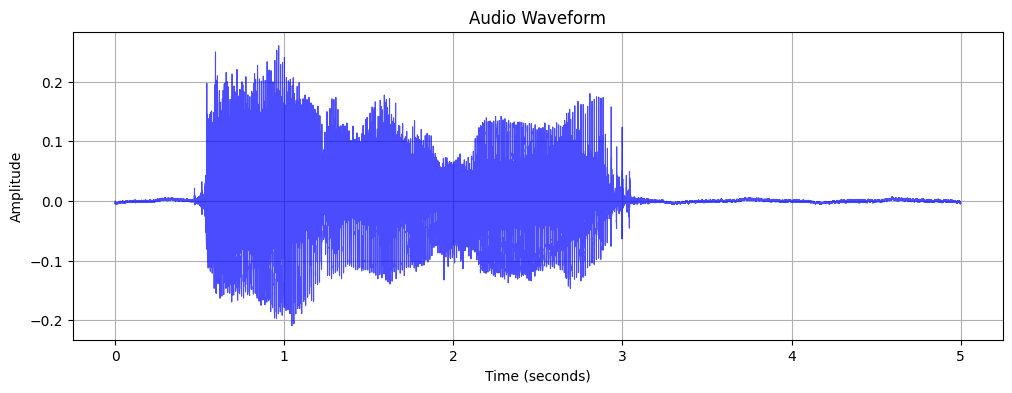

In [133]:
# Graph audio data
import matplotlib.pyplot as plt

# Convert to 1D array
audio_data = audio_data.flatten() # (sample_rate, 1) -> (sample_rate,)

# Create time axis
time_axis = np.linspace(0, duration, len(audio_data))

# Plot waveform
plt.figure(figsize=(12, 4))
plt.plot(time_axis, audio_data, color='blue', alpha=0.7, linewidth=0.8)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Audio Waveform")
plt.grid()
plt.show()

In [158]:
import os
import plotly.graph_objects as go
from scipy.io.wavfile import read

folder = "Audio edited"
filename = "erozija2.wav"

path = os.path.join(folder, filename)

sample_rate, audio_data = read(path)

y = (audio_data / np.max(np.abs(audio_data))).astype(np.float32)
t = np.linspace(0, len(y) / sample_rate, len(y))

# Ustvari interaktivni graf
fig = go.Figure()

fig.add_trace(go.Scatter(x=t, y=y, mode="lines", name="Signal"))

fig.update_layout(
    title="Časovni potek signala" + f" ({filename})",
    xaxis_title="Čas [s]",
    yaxis_title="Amplituda",
    font=dict(size=16),
    xaxis=dict(
        tickformat="0.2f",
        showgrid=True,
    ),
    yaxis=dict(showgrid=True),
)

fig.show()


Poročilo

<img src="Slike/Picture1.png"/>
<img src="Slike/Picture2.png"/>
<img src="Slike/Picture3.png"/>
<img src="Slike/Picture4.png"/>
<img src="Slike/Picture5.png"/>
<img src="Slike/Picture6.png"/>
<img src="Slike/Picture7.png"/>
<img src="Slike/Picture8.png"/>
<img src="Slike/Picture10.png"/>
<img src="Slike/Picture11.png"/>
<img src="Slike/Picture12.png"/>
<img src="Slike/Picture13.png"/>
<img src="Slike/Picture14.png"/>
<img src="Slike/Picture15.png"/>
<img src="Slike/Picture16.png"/>
<img src="Slike/Picture17.png"/>
Signal žvižganja predstavlja popolno sinusoido.
#
<img src="Slike/Picture18.png"/>
<img src="Slike/Picture19.png"/>
<img src="Slike/Picture20.png"/>
SIGNAL PODOBEN SIGNALU O
#
<img src="Slike/Picture21.png"/>
SIGNAL PODOBEN SIGNALU I
#
<img src="Slike/Picture22.png"/>
SIGNAL PODOBEN SIGNALU A
#

Iz signala izgovorjave besede »EROZIJA« so razvidni signali samoglasnikov.


In [23]:
import numpy as np
import os
from scipy.io.wavfile import read
from scipy.signal import correlate

def find_vowel_positions(word_path, vowels_paths, sample_rate):
    # Preberemo celoten signal besede "erozija"
    _, word_signal = read(word_path)

    vowel_positions = {}  # Shrani rezultate križne korelacije

    for vowel, vowel_path in vowels_paths.items():
        # Preberemo obrezan samoglasnik
        _, vowel_signal = read(vowel_path)

        # Izvedemo križno korelacijo
        correlation = correlate(word_signal, vowel_signal, mode="valid")
        lag = np.argmax(correlation)  # Poiščemo maksimum korelacije

        # Izračunamo čas nastopa samoglasnika (lag pretvorimo v sekunde)
        time_position = lag / sample_rate
        vowel_positions[vowel] = time_position

        print(f"Samoglasnik '{vowel}' se pojavi pri {time_position:.3f} s")

    return vowel_positions

# Definiramo poti do WAV datotek
folder = "Audio edited"
word_file = os.path.join(folder, "erozija2.wav")  # Beseda "erozija"

folder = os.path.join(folder, "Cut")
vowel_files = {
    'a': os.path.join(folder, "A_cut2.wav"),
    'i': os.path.join(folder, "I_cut.wav"),
    'o': os.path.join(folder, "O_cut2.wav")
}

# Pokličemo funkcijo in določimo frekvenco (nastavi ustrezno frekvenco svojega posnetka)
sample_rate = 44100  # Običajna vzorčna frekvenca v Hz
vowel_positions = find_vowel_positions(word_file, vowel_files, sample_rate)

Samoglasnik 'a' se pojavi pri 2.245 s
Samoglasnik 'i' se pojavi pri 1.912 s
Samoglasnik 'o' se pojavi pri 1.149 s


![](Slike/Picture23.png)
S pomočjo križne korelacije sem uspel poiskati prvi pojav posameznega samoglasnika, kar omogoča, da ugotovim katere druge črke se nahajajo v signalu na katerih mestih.